In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import spacy
%matplotlib inline

In [234]:
import os
ddir = r"E:\Dataset"

In [235]:
nlp = spacy.load('en_core_web_sm')

In [236]:
# ! python -m spacy download en_core_web_sm

In [237]:
df = pd.read_csv(os.path.join(ddir, 'SMSSpamCollection'),sep="\t",names=["label","message"])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
Lb = LabelEncoder()

In [240]:
df.label = Lb.fit_transform(df.label)
# 0 - ham and 1 - spam

In [241]:
Lb.classes_

array(['ham', 'spam'], dtype=object)

In [242]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [243]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [244]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [245]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [246]:
df.duplicated().sum()

403

In [247]:
df[df.duplicated()] #.sum()

,label,message
103,0,As per your request 'Melle Melle (Oru Minnamin...
154,0,As per your request 'Melle Melle (Oru Minnamin...
207,0,"As I entered my cabin my PA said, '' Happy B'd..."
223,0,"Sorry, I'll call later"
326,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [248]:
df = df.drop_duplicates(keep="first")

In [249]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [250]:
df.label.value_counts()

0    4516
1     653
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

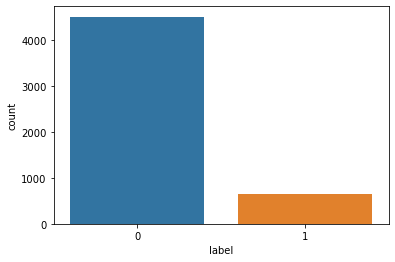

In [251]:
sns.countplot(x= df.label)

In [252]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [253]:
df["char_len"] = df.apply(lambda x :  len(x[1]), axis = 1)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_2548\3528255562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_len"] = df.apply(lambda x :  len(x[1]), axis = 1)


In [254]:
df

,label,message,char_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [255]:
df["word_len"] = df.apply(lambda x : len(x[1].split(" ")), axis = 1)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_2548\3202302345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_len"] = df.apply(lambda x : len(x[1].split(" ")), axis = 1)


In [256]:
df.head()

,label,message,char_len,word_len
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [257]:
df["sen_len"] = df.message.apply(lambda x : len(x.split(".")))

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_2548\26209976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sen_len"] = df.message.apply(lambda x : len(x.split(".")))


In [258]:
df.head()

,label,message,char_len,word_len,sen_len
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [259]:
df[["char_len","word_len","sen_len"]].groupby(by=df["label"]).mean()

,char_len,word_len,sen_len
label,,,
0,70.905890,14.364482,2.944198
1,137.704441,23.787136,3.062787


In [260]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

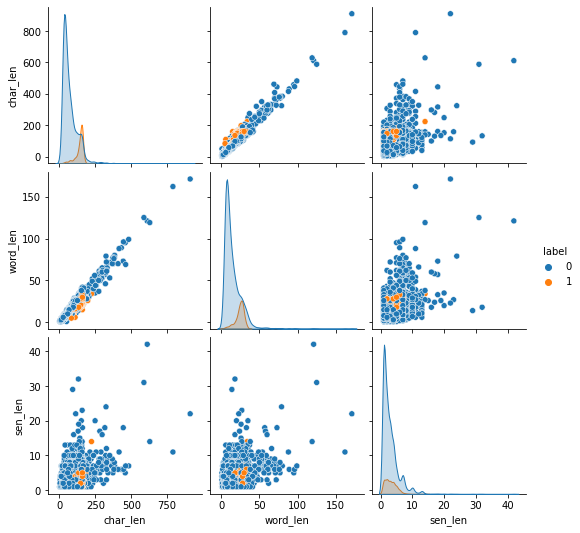

In [261]:
sns.pairplot(df,hue="label")

In [262]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [263]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

In [264]:
import re

In [265]:
# a-z A-Z 0-9 _
patt = r"([\w]+)\s"
st = "how you me $ a#s0 sld@ r23 "

In [266]:
re.findall(patt, st)

['how', 'you', 'me', 's0', 'r23']

In [267]:
def clean_msg(msg) :
    msg = msg.lower()
    return " ".join(re.findall(patt, msg))
#     msg = nltk.word_tokenize(msg)
#     li1 = []
#     for wd in msg :
#         if wd.isalnum() :
#             li1.append(wd)
#     lis2=[]
#     for wd in li1 :
#         if wd not in stopwords.words("english") and string.punctuation :
#             lis2.append(wd)
#     li1 = []
#     for wd in lis2 :
#         li1.append(ps.stem(wd))
#     return " ".join(li1)

In [268]:
clean_msg("NIce To Meet You! i Loved you still_num,to,talk abou! hi 20... %% ")

'nice to meet i loved you talk hi'

In [269]:
clean_msg(df["message"][2])

'free entry in 2 a wkly comp to win fa cup final tkts 21st may text fa to 87121 to receive entry std txt s apply'

In [270]:
df["clear_msg"] = df.message.apply(clean_msg)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_2548\3691710335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clear_msg"] = df.message.apply(clean_msg)


In [271]:
df

,label,message,char_len,word_len,sen_len,clear_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go until jurong available only in bugis n grea...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joking wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say so early u c already then
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah i t think he goes to he lives around here
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,30,5,this is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?,36,8,1,will ü b going to esplanade fr
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,was in mood for any other
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,the guy did some bitching but i acted like d b...


In [272]:
# from wordcloud import WordCloud

In [273]:
# wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

In [274]:
# fre_wd = wc.generate(df.clear_msg.str.cat(sep=" "))

In [275]:
# plt.figure(figsize=(8,8))
# plt.imshow(fre_wd)

In [276]:
# tot_ham_list=[]
# for msg in df[df.label == 1]["clear_msg"].tolist() :
#     for wd in msg.split() :
#         tot_ham_list.append(wd)

In [277]:
# len(tot_ham_list)

In [278]:
# from collections import Counter

In [279]:
# Counter(tot_ham_list).most_common(20)

In [280]:
# ddf = pd.DataFrame(Counter(tot_ham_list).most_common(20))
# ddf

In [281]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [282]:
cv = CountVectorizer(max_features=5000)
# tfidf = TfidfVectorizer()

In [284]:
df.sample()

,label,message,char_len,word_len,sen_len,clear_msg
3140,0,Is ur lecture over?,19,4,1,is ur lecture


In [285]:
# ["soem", "sews"]
df.clear_msg.values.shape

(5169,)

In [286]:
x_cv = cv.fit_transform(df.clear_msg).toarray()
# x_tfidf = tfidf.fit_transform(df.clear_msg).toarray()

In [287]:
cv.get_feature_names()

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '07046744435',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '077xxx',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07880867867',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '0870',
 '08700621170150p',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0870241182716',
 '08702490080',
 '08702840625',
 '0870737910216yrs',
 '08707500020',
 '08707509020',
 '08708800282',
 '08709501522',
 '0871047

In [288]:
x_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [289]:
x_cv.shape

(5169, 5000)

In [290]:
x_cv.shape

(5169, 5000)

In [291]:
df.sample()

,label,message,char_len,word_len,sen_len,clear_msg
1066,0,No my mum went 2 dentist.,25,6,2,no my mum went 2


In [292]:
y = df.label.values

In [293]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [294]:
y.shape

(5169,)

In [295]:
x_cv.shape

(5169, 5000)

In [296]:
x_cv_train,x_cv_test,y_cv_train,y_cv_test = train_test_split(x_cv,y,test_size=0.2, stratify=y)
# x_tfidf_train,x_tfidf_test,y_tfidf_train,y_tfidf_test = train_test_split(x_tfidf,y,test_size=0.2)

In [297]:
x_cv_train.shape, x_cv_test.shape, y_cv_train.shape, y_cv_test.shape 

((4135, 5000), (1034, 5000), (4135,), (1034,))

In [298]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [299]:
Mnb = MultinomialNB()
Gnb = GaussianNB()
Bnb = BernoulliNB()

In [300]:
Mnb.fit(x_cv_train,y_cv_train)
pred_cv = Mnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))
print(metrics.classification_report(y_cv_test, pred_cv))

[[890  13]
 [ 14 117]]
0.9738878143133463
0.9
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       903
           1       0.90      0.89      0.90       131

    accuracy                           0.97      1034
   macro avg       0.94      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [301]:
# FP => model-flase acc => true ( spam )

In [302]:
Gnb.fit(x_cv_train,y_cv_train)
pred_cv = Gnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))
print(metrics.classification_report(y_cv_test, pred_cv))

[[721 182]
 [ 19 112]]
0.8056092843326886
0.38095238095238093
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       903
           1       0.38      0.85      0.53       131

    accuracy                           0.81      1034
   macro avg       0.68      0.83      0.70      1034
weighted avg       0.90      0.81      0.83      1034



In [303]:
Bnb.fit(x_cv_train,y_cv_train)
pred_cv = Bnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))
print(metrics.classification_report(y_cv_test, pred_cv))

[[900   3]
 [ 18 113]]
0.9796905222437138
0.9741379310344828
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.86      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [304]:
# Mnb.fit(x_tfidf_train,y_tfidf_train)
# pred_tfidf = Mnb.predict(x_tfidf_test)
# print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
# print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
# print(metrics.precision_score(y_tfidf_test,pred_tfidf))

In [305]:
# Gnb.fit(x_tfidf_train,y_tfidf_train)
# pred_tfidf = Gnb.predict(x_tfidf_test)
# print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
# print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
# print(metrics.precision_score(y_tfidf_test,pred_tfidf))

In [306]:
# Bnb.fit(x_tfidf_train,y_tfidf_train)
# pred_tfidf = Bnb.predict(x_tfidf_test)
# print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
# print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
# print(metrics.precision_score(y_tfidf_test,pred_tfidf))

In [307]:
# import pickle
# with open("clean_msg.pkl","wb") as f :
#     pickle.dump(clean_msg,f)

In [308]:
# with open("clean_msg.pkl","rb") as f1 :
#     hi = pickle.load(f1)
# #     print(hi("rakesh kumar hi hello how are you"))
#     print(hi(df["message"][2]))

In [309]:
#'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [310]:
# with open("mat_num.pkl","wb") as f :
#     pickle.dump(tfidf,f)

In [311]:
# with open("model_spam_ham.pkl","wb") as f :
#     pickle.dump(Mnb,f)

In [314]:
# pred_tfidf = Mnb.predict(x_tfidf_test)
# print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
# print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
# print(metrics.precision_score(y_tfidf_test,pred_tfidf))

In [316]:
# pred_tfidf

In [317]:
# Mnb.predict


In [318]:
df.head()

,label,message,char_len,word_len,sen_len,clear_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go until jurong available only in bugis n grea...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joking wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say so early u c already then
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah i t think he goes to he lives around here


In [319]:
def pred_spam_or_ham(text) : 
    clean_txt = clean_msg(text)
    # print(clean_txt)
    clean_text_vec =  cv.transform([clean_txt]).toarray()
    y_clean_msg_pred =  Bnb.predict(clean_text_vec)[0]
    return Lb.classes_[y_clean_msg_pred]

In [320]:
pred_spam_or_ham("free entri 2 wkli comp win fa cup final tkt ")

'spam'

In [321]:
df[df['label'] == 1].sample(3)['message'].values

array(['Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.',
       'Cashbin.co.uk (Get lots of cash this weekend!) www.cashbin.co.uk Dear Welcome to the weekend We have got our biggest and best EVER cash give away!! These..',
       'CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Calls£1/minmoremobsEMSPOBox45PO139WA'],
      dtype=object)

In [322]:
while True : 
    inp = input("Enter Message : ")
    if inp == 'quite' or inp == 'x' or inp == 'break' : 
        break
    print(f"This Message : {inp} : {pred_spam_or_ham(inp)}")

Enter Message : 
This Message :  : ham
Enter Message : thank you
This Message : thank you : ham
Enter Message : quite
